In [1]:
import pandas as pd
import glob
import os
from datetime import datetime
import numpy as np
import random
import matplotlib.pyplot as plt
import re
import seaborn as sns

plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

In [2]:
csv_files = glob.glob(os.path.join('//global/scratch/users/norahluo/trajectory', '*.csv'))

In [3]:
csv_files[0]

'//global/scratch/users/norahluo/trajectory/traj_EMBUSA-1709100.csv'

In [4]:
demo = pd.read_csv('//global/scratch/users/norahluo/demo.csv', usecols = lambda x: 'Unnamed: 0' not in x)

In [5]:
def inspect_(var, varname, reorder = None, rot = 0):
    ax = demo[var].value_counts()[reorder].plot(kind = 'bar', rot = rot, figsize = (6, 4))
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width()/2, bar.get_height()),
                    ha = 'center', va = 'center',
                   size = 9, xytext = (0, 6), textcoords = 'offset points')

    ax.grid(alpha = 0.1)
    ax.set_xlabel(varname)
    ax.set_ylabel('Number of individuals')

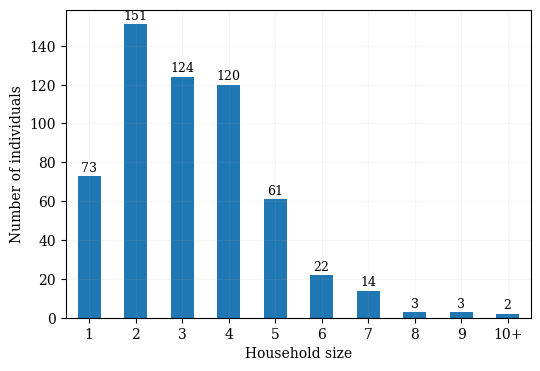

In [6]:
inspect_('hh_size', 'Household size', ['1','2','3','4','5','6','7','8','9','10+'])

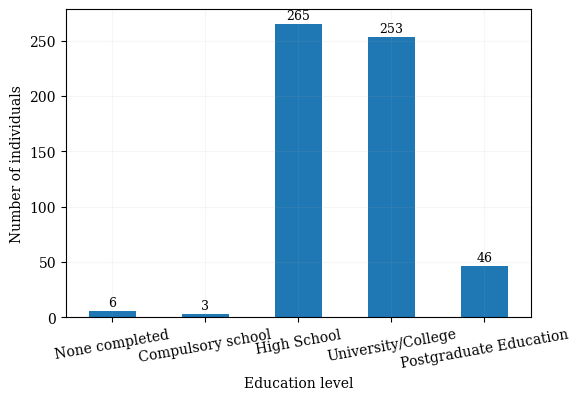

In [7]:
inspect_('edu_level', 'Education level', ['None completed', 'Compulsory school', 'High School', 'University/College', 'Postgraduate Education' ], 10)

In [9]:
weekday = []
weekend = []
commute_per = []
panelist_id = []
for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['date'], usecols = lambda x: 'Unnamed: 0' not in x)
    df = df.loc[(df.date >= '2020-01-06')]
    weekday.append(df[df.weekday < 5].commute.mean())
    weekend.append(df[df.weekday >= 5].commute.mean())
    commute_per.append(df.commute_filled.mean())
    panelist_id.append(re.split(r'_|\.',file)[1])


In [10]:
commute_info = pd.DataFrame({'wday_commute_rate':weekday,
                             'wkend_commute_rate':weekend,
                             'commute_rate': commute_per,
                             'panelist_id': panelist_id})
demo = demo.merge(commute_info, on = 'panelist_id')

In [11]:
demo.describe()

,postal_code,dfrw_cap_mean,age,hh_income_mid,wday_commute_rate,wkend_commute_rate,commute_rate
count,559.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,53588.019678,16175.207550,39.966841,59659.685864,0.527847,0.267884,0.451451
std,28185.168012,16466.716375,10.442514,39167.107444,0.231618,0.220381,0.186398
min,1420.000000,269.004482,18.000000,7500.000000,0.029070,0.000000,0.031282
25%,30542.000000,5627.984624,32.000000,37500.000000,0.355769,0.086643,0.308617
50%,53511.000000,12025.750590,39.000000,37500.000000,0.554649,0.194139,0.492341
75%,77082.500000,20859.611000,47.000000,65000.000000,0.706835,0.428030,0.603034
max,99320.000000,155562.174673,68.000000,250000.000000,0.959075,0.915493,0.877475


In [13]:
demo.groupby('dfrw_cap_mean')['commute_rate'].mean()

dfrw_cap_mean
269.004482       0.071071
330.847026       0.151759
552.911100       0.663230
553.241471       0.084827
555.823400       0.593186
                   ...   
85172.185724     0.106957
86149.841857     0.158317
126545.972795    0.108040
134074.657032    0.341341
155562.174673    0.222937
Name: commute_rate, Length: 573, dtype: float64

In [11]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

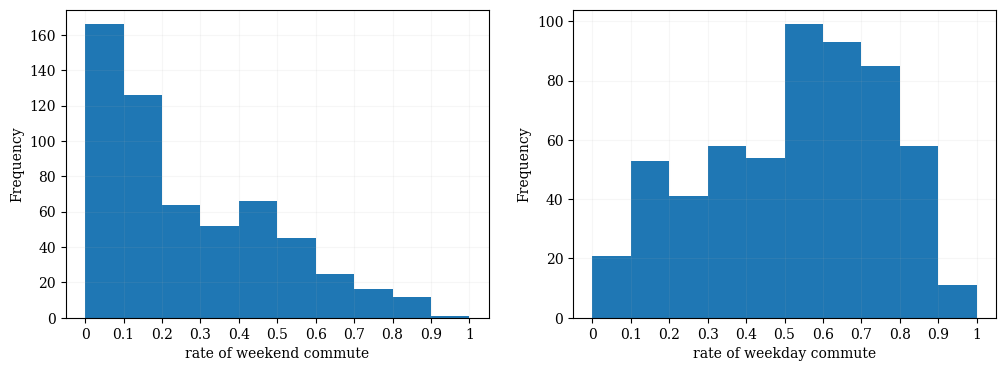

In [12]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
axes[0] = demo.wkend_commute_rate.plot(kind = 'hist', bins = bins, ax = axes[0])
axes[0].set_xticks(bins, bins)
axes[0].grid(alpha = 0.1)
axes[0].set_xlabel('rate of weekend commute')
axes[1] = demo.wday_commute_rate.plot(kind = 'hist', bins = bins, ax = axes[1])
axes[1].set_xticks(bins, bins)
axes[1].grid(alpha = 0.1)
axes[1].set_xlabel('rate of weekday commute')
plt.show()

In [13]:
def commute_rate_dist_plot(by, varname, order = None, rot = 0):
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))
    
    axes[0] = sns.boxplot(data=demo, x=by, order=order, y = 'wday_commute_rate',palette=['skyblue'], medianprops={'color':'orange'}, ax = axes[0])
    axes[0].set_xlabel(varname)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=rot)
    axes[1] = sns.boxplot(data=demo, x=by, order=order, y = 'wkend_commute_rate',palette=['skyblue'], medianprops={'color':'orange'}, ax = axes[1])
    axes[1].set_xlabel(varname)
    axes[1].set_xticklabels(axes[0].get_xticklabels(), rotation=rot)

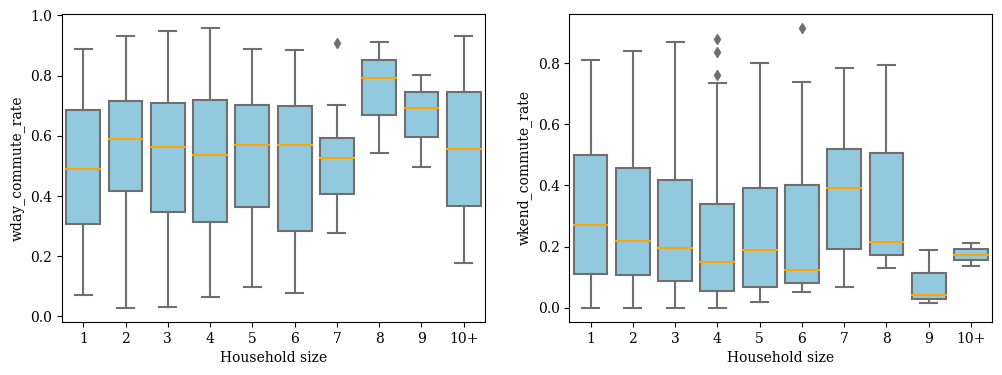

In [14]:
commute_rate_dist_plot(by = 'hh_size', varname = 'Household size', order = ['1','2','3','4','5','6','7','8','9','10+'])

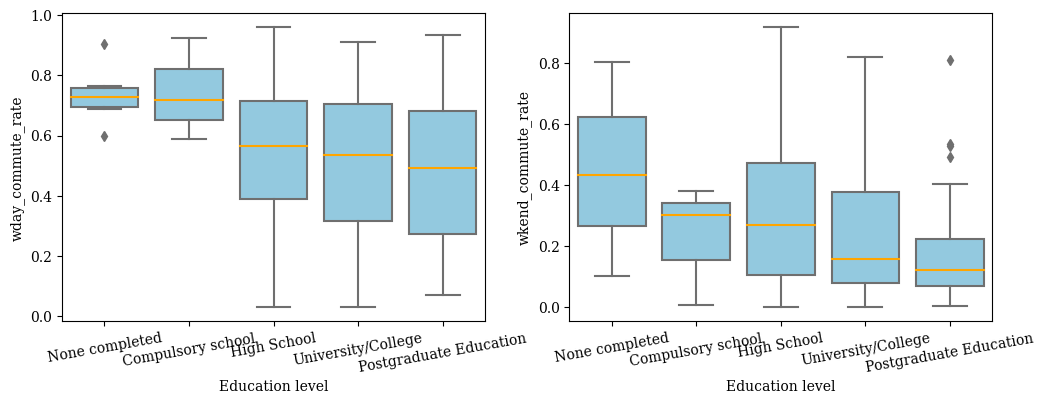

In [15]:
commute_rate_dist_plot(by = 'edu_level', varname = 'Education level', order = ['None completed', 'Compulsory school', 'High School', 'University/College', 'Postgraduate Education' ], rot = 10)

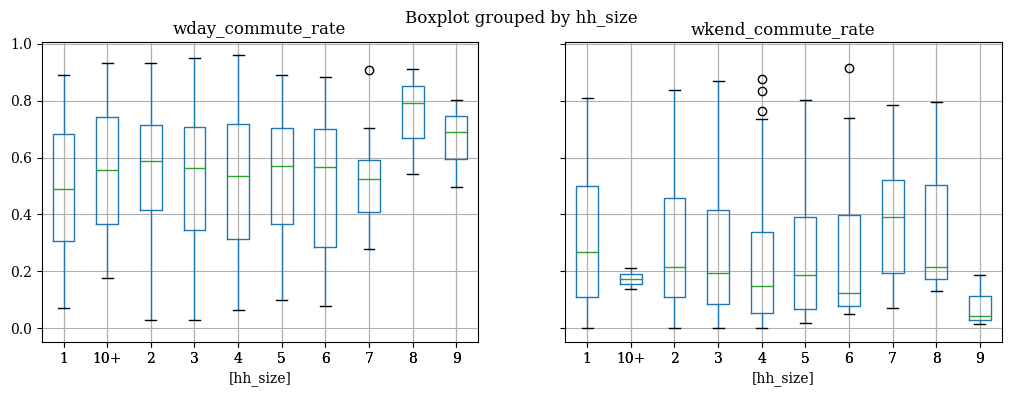

In [16]:
ax = demo[['wday_commute_rate','wkend_commute_rate', 'hh_size']].boxplot(by = 'hh_size', figsize = (12, 4))
# ax[0].set_xticks([i for i in range(1, 11)]+[i for i in range(1, 11)], ['1','2','3','4','5','6','7','8','9','10+']+['1','2','3','4','5','6','7','8','9','10+'])
plt.show()

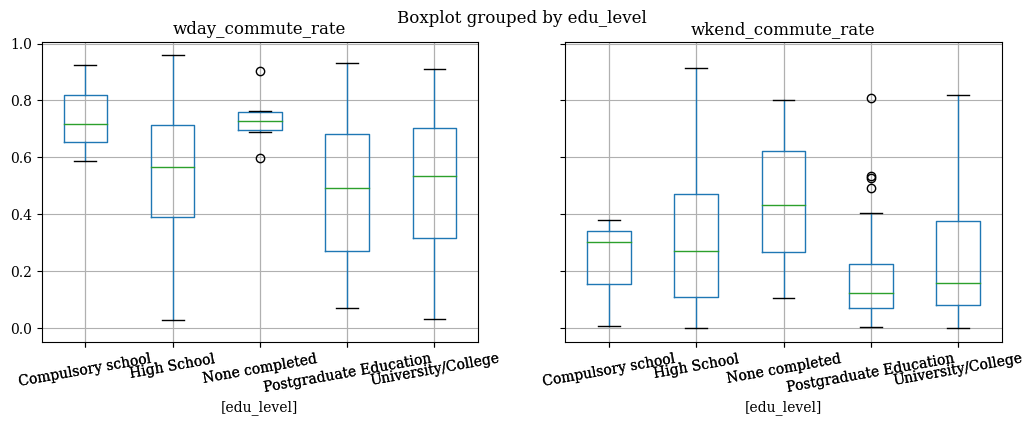

In [18]:
ax = demo[['wday_commute_rate','wkend_commute_rate', 'edu_level']].boxplot(by = 'edu_level', figsize = (12, 4), rot = 10)
# ax[0].set_xticks([i for i in range(1, 11)]+[i for i in range(1, 11)], ['1','2','3','4','5','6','7','8','9','10+']+['1','2','3','4','5','6','7','8','9','10+'])
plt.show()

In [46]:
print(demo[demo.edu_level.isin(['University/College', 'Postgraduate Education'])][['wday_commute_rate', 'wkend_commute_rate']].describe())
print(demo[~demo.edu_level.isin(['University/College', 'Postgraduate Education'])][['wday_commute_rate', 'wkend_commute_rate']].describe())

       wday_commute_rate  wkend_commute_rate
count         299.000000          299.000000
mean            0.502608            0.229295
std             0.240526            0.201289
min             0.030043            0.000000
25%             0.307211            0.076136
50%             0.528481            0.151899
75%             0.695932            0.348257
max             0.932107            0.819853
       wday_commute_rate  wkend_commute_rate
count         274.000000          274.000000
mean            0.553176            0.309491
std             0.217399            0.232139
min             0.028986            0.000000
25%             0.391181            0.106094
50%             0.576552            0.271093
75%             0.716400            0.469007
max             0.957597            0.916084


In [47]:
print(demo[demo.edu_level.isin(['High School', 'University/College', 'Postgraduate Education'])][['wday_commute_rate', 'wkend_commute_rate']].describe())
print(demo[~demo.edu_level.isin(['High School', 'University/College', 'Postgraduate Education'])][['wday_commute_rate', 'wkend_commute_rate']].describe())

       wday_commute_rate  wkend_commute_rate
count         564.000000          564.000000
mean            0.523457            0.265946
std             0.230845            0.219335
min             0.028986            0.000000
25%             0.353945            0.085938
50%             0.547630            0.191659
75%             0.703834            0.425316
max             0.957597            0.916084
       wday_commute_rate  wkend_commute_rate
count           9.000000            9.000000
mean            0.735581            0.374030
std             0.116039            0.254251
min             0.583815            0.014440
25%             0.689453            0.219298
50%             0.715108            0.381295
75%             0.763359            0.453875
max             0.920391            0.803828


In [48]:
print(demo[['wday_commute_rate', 'wkend_commute_rate']].describe())

       wday_commute_rate  wkend_commute_rate
count         573.000000          573.000000
mean            0.526789            0.267644
std             0.230946            0.220081
min             0.028986            0.000000
25%             0.354962            0.086022
50%             0.554828            0.192661
75%             0.705357            0.426540
max             0.957597            0.916084


#### 1) Vaccine Status

In [3]:
def vaccine_status(dt):
    if dt < datetime(2020, 3, 16):
        return 'pre-covid'
    elif dt <= datetime(2020, 5, 30):
        return 'shelter-in-place'
    elif dt <= datetime(2021, 2, 13): # when pct of ppl (9.7%) receive at least 1 dose start to rise
        return 'pre-vax'
    elif dt <= datetime(2022, 1, 8): # when pct of ppl (62.5%) complete the primary series reach 90% plateau
        return 'during'
    else:                           
        return 'post-vax'

In [7]:
for file in csv_files:
    df = pd.read_csv(file, usecols = lambda x: 'Unnamed: 0' not in x, parse_dates = ['date'])
    try:
        df.drop(columns = ['pre-covid', 'shelter-in-place', 'pre-vax', 'during', 'post-vax'], inplace = True)
    except:
        df.drop(columns = ['post-vax', 'pre-vax', 'during'], inplace = True)
    df['vax_status'] = df.apply(lambda x: vaccine_status(x.date), axis = 1)
    df = df.join(pd.get_dummies(df.vax_status).astype(int))
    if 'post-vax' not in df.columns:
        df['post-vax'] = 0
    
    df.to_csv(file, index = False)

#### 2) Holiday

In [135]:
import holidays
us_holidays = holidays.US(years = [2020, 2021, 2022])
holiday = pd.DataFrame.from_dict(us_holidays, orient = 'index').reset_index().sort_values(by = 'index')
holiday.rename(columns = {'index': 'date', 0: 'holiday'}, inplace = True)
holiday['date'] = pd.to_datetime(holiday['date'])
holiday['weekday'] = holiday['date'].dt.weekday
holiday = holiday[holiday.weekday < 5]

# extra Friday off for Thursday holiday + others
extra = pd.DatetimeIndex(['2020-01-02', '2020-11-27', '2021-11-12', '2021-11-26', '2022-07-05', '2022-11-25'])
extras = pd.DataFrame({'date': pd.Series(extra), 'holiday': 'Extra Friday or others'})
extras['weekday'] = extras['date'].dt.weekday

# christmas extra day off
yr2019 = pd.DatetimeIndex(['2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31'])
yr2020 = pd.date_range(start = '2020-12-28', end = '2020-12-31')
yr2021 = pd.date_range(start = '2021-12-27', end = '2021-12-31')
yr2022 = pd.date_range(start = '2022-12-26', end = '2022-12-30')
christmas = pd.DataFrame({'date':pd.concat([pd.Series(yr2019), pd.Series(yr2020), pd.Series(yr2021), pd.Series(yr2022)]), 'holiday': 'Chistmas Extra'})
christmas['weekday'] = christmas['date'].dt.weekday

holiday_extra = pd.concat([holiday, christmas, extras])

In [147]:
dates = holiday_extra[holiday_extra.holiday != 'Extra Friday or others'].date.values
dates_extra = holiday_extra.date.values

def is_holiday(dt, dates):
    return 1 if dt in dates else 0


In [148]:
for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['date'], usecols = lambda x: 'Unnamed: 0' not in x)
    df['is_holiday'] = df.apply(lambda x: is_holiday(x.date, dates), axis = 1)
    df['is_holiday_extra'] = df.apply(lambda x: is_holiday(x.date, dates_extra), axis = 1)
    df.to_csv(file, index = False)

#### 3) Telecommute Probability

In [25]:
np.random.seed(624)

In [23]:
def fill_missing(df, N, p_wday, p_wkend):
    """
    First N records, rand
    After the first N records, rand by looking into the distribution of previous N days (N can be 14, 21, 28, etc.,), 
    which assumes the behavior of the individual does not change that much for X (X = 2, 3, 4, etc.,) weeks. 
    """
    df_ = df.copy()
    df_['commute_filled_diff_dist'] = df_['commute']
    missing_index = df_[df_.commute.isna()].index
    
    for index in missing_index:

        if index < N: 
            prob = dict(zip(range(7), [p_wday] * 5 +[p_wkend] * 2)) 
        else:
            prob = df_.iloc[index-N :index].groupby('weekday')['commute_filled_diff_dist'].mean()
              
        df_.loc[index, 'commute_filled_diff_dist'] = np.random.binomial(1, prob[df_.loc[index].weekday])
 
    
    return df_['commute_filled_diff_dist']

In [212]:
# Use population mean to impute missing values
total_diff = 0
for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['date'], usecols = lambda x: 'Unnamed: 0' not in x)
    edu_level = demo[demo.panelist_id == re.split(r'_|\.',file)[1]]['edu_level'].values[0]
    df['commute_filled_diff_dist'] = fill_missing(df = df, N = 21, p_wday = 0.53, p_wkend = 0.27)
    total_diff += (df['commute_filled_diff_dist'] != df['commute_filled']).sum()
    df.to_csv(file, index = False)

In [213]:
total_diff

2864

In [214]:
# use the commute probability by education level to impute missing value
total_diff = 0
for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['date'], usecols = lambda x: 'Unnamed: 0' not in x)
    edu_level = demo[demo.panelist_id == re.split(r'_|\.',file)[1]]['edu_level'].values[0]
    if edu_level in ['University/College', 'Postgraduate Education']:
        df['commute_filled_diff_dist'] = fill_missing(df = df, N = 21, p_wday = 0.5, p_wkend = 0.23)
    else:
        df['commute_filled_diff_dist'] = fill_missing(df = df, N = 21, p_wday = 0.55, p_wkend = 0.31)
    total_diff += (df['commute_filled_diff_dist'] != df['commute_filled']).sum()
    df.to_csv(file, index = False)

In [215]:
total_diff

2848

In [26]:
# use commute probability by income group to impute missing value
total_diff = 0
wday_commute_rate = demo.groupby('hh_income_mid')['wday_commute_rate'].mean().to_dict()
wkend_commute_rate = demo.groupby('hh_income_mid')['wkend_commute_rate'].mean().to_dict()
for file in csv_files:
    df = pd.read_csv(file, parse_dates = ['date'], usecols = lambda x: 'Unnamed: 0' not in x)
    income = demo[demo.panelist_id == re.split(r'_|\.',file)[1]]['hh_income_mid'].values[0]
    df['commute_filled_diff_dist'] = fill_missing(df = df, N = 21, p_wday = wday_commute_rate[income], p_wkend = wkend_commute_rate[income])
    total_diff += (df['commute_filled_diff_dist'] != df['commute_filled']).sum()
    df.to_csv(file, index = False)

In [27]:
total_diff

2871